# Задание по курсу "Анализ данных"

### Разбить заданный датасет на 2 кластера, используя агломеративный иерархический метод и метод к-средних. 

### Методом главных компонент построить два новых признака для описания объектов из датасета и кластеризовать данные по этим двум признакам на два кластера (любым методом). Сравнить качество кластеризации. 

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn-v0_8-pastel')

In [2]:
df = pd.read_csv('data/beauty.csv')
print(df.shape)
df.head()

(1260, 10)


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [4]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [5]:
df.wage.value_counts()

wage
3.75     36
7.69     32
4.81     28
1.98     24
7.96     21
         ..
6.66      1
3.58      1
1.63      1
11.06     1
1.61      1
Name: count, Length: 520, dtype: int64

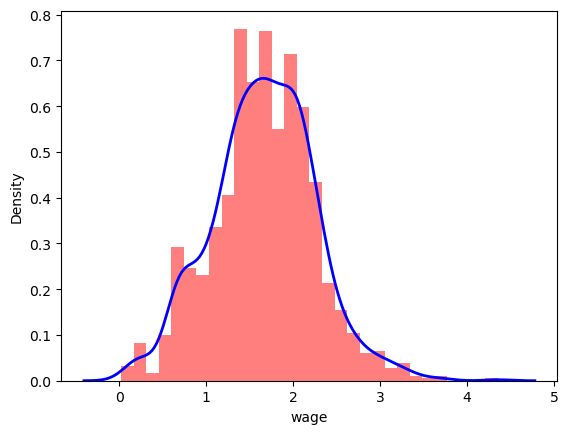

In [6]:
log_values = df.wage.apply(np.log)

plt.hist(log_values, bins=30, color='red', alpha=0.5, density=True)

sns.kdeplot(log_values, color='blue', linewidth=2);

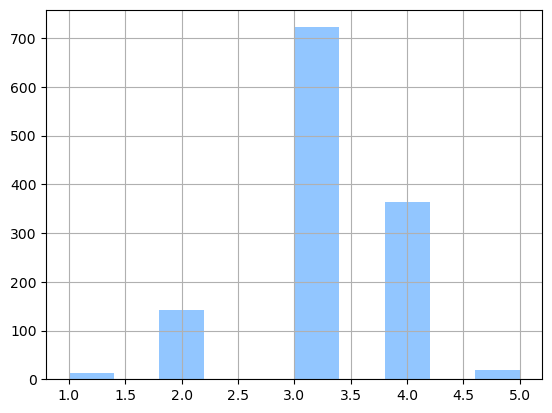

In [7]:
df.looks.hist();

In [8]:
df.female.value_counts()

female
0    824
1    436
Name: count, dtype: int64

In [9]:
df.married.value_counts()

married
1    871
0    389
Name: count, dtype: int64

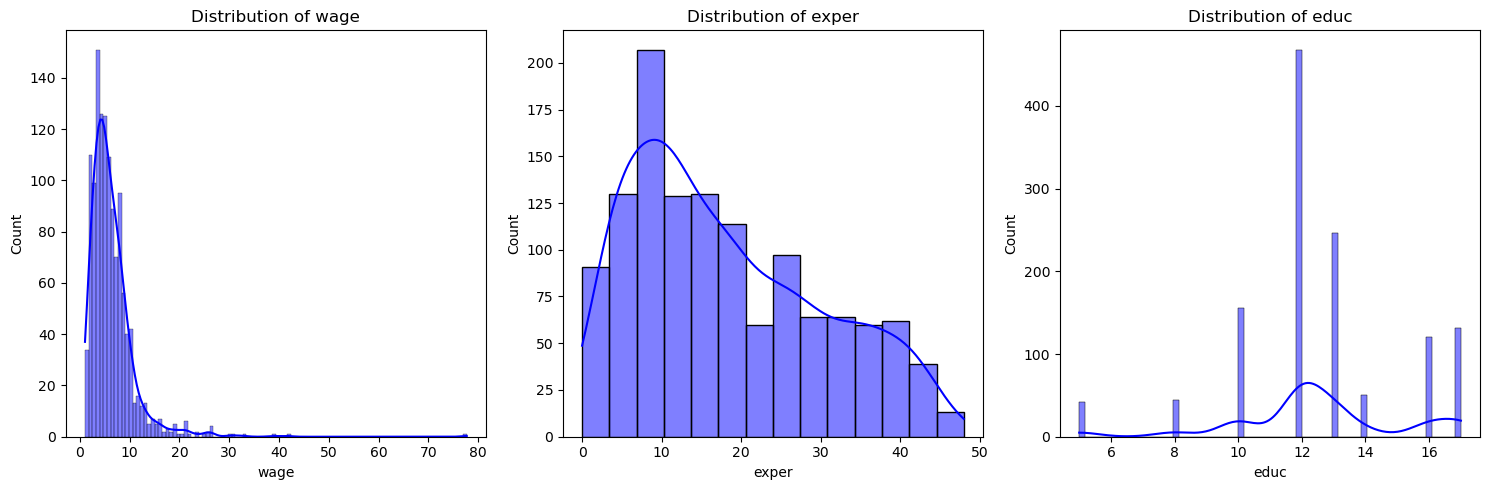

In [10]:
numerical_columns = ['wage', 'exper', 'educ']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for col, ax in zip(numerical_columns, axes):
    sns.histplot(df[col], kde=True, ax=ax, color="blue")
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()


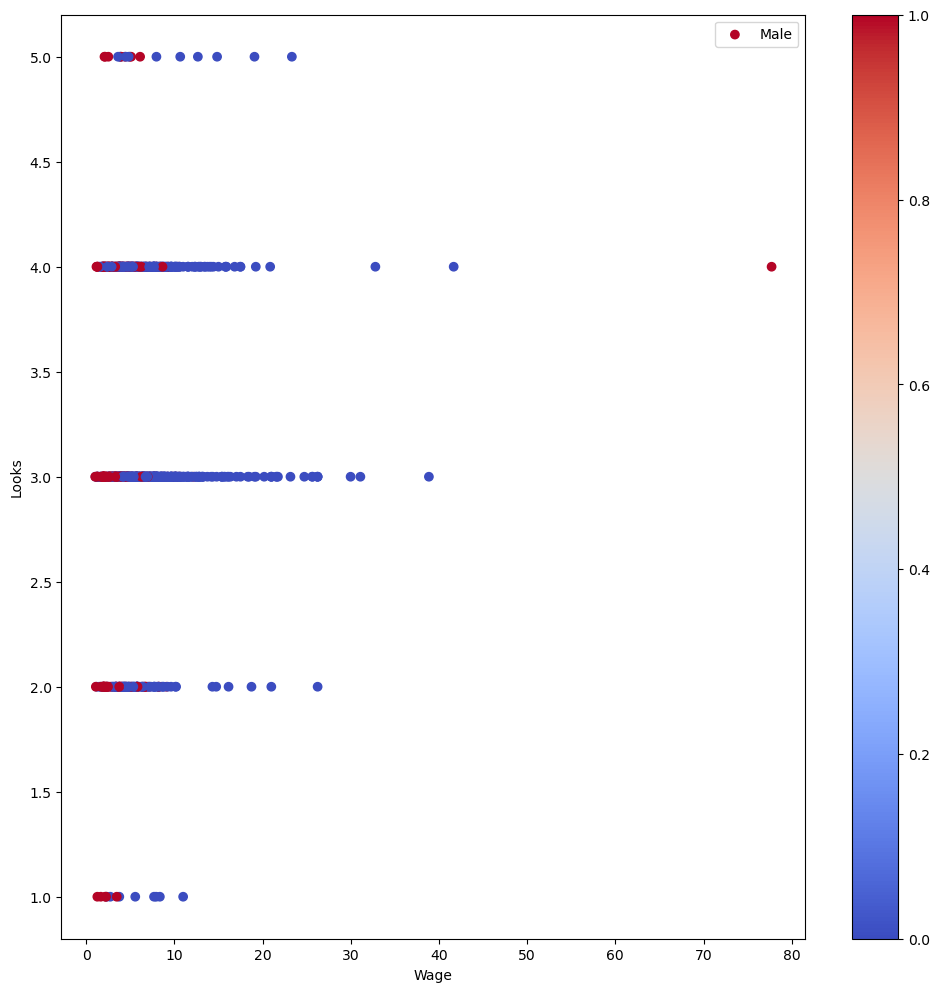

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(df.wage, df.looks, c=df.female, cmap='coolwarm');
plt.legend(['Male', 'Female']);
plt.colorbar();
plt.xlabel('Wage');
plt.ylabel('Looks');

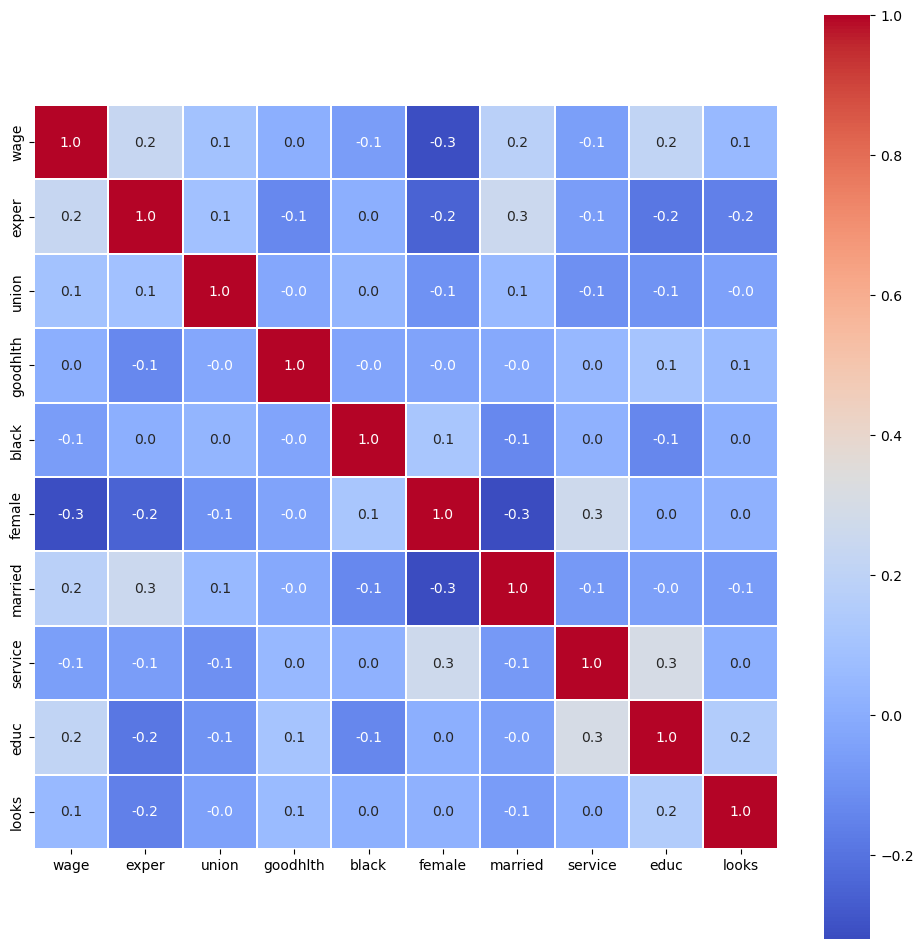

In [12]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.subplots(figsize=(12, 12))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

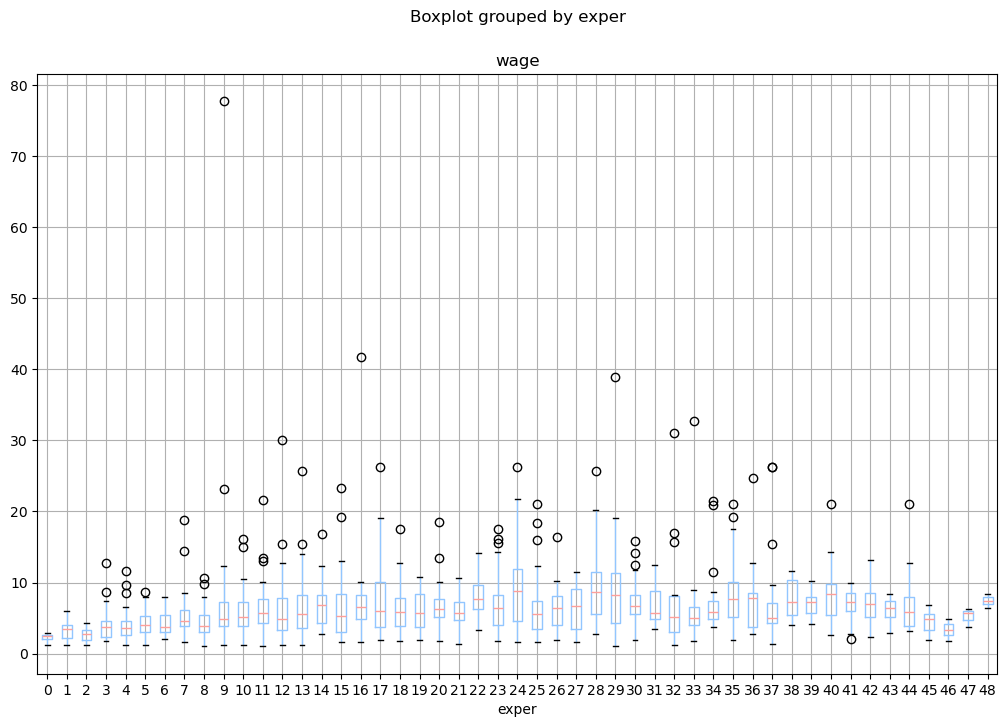

In [13]:
df.boxplot(column='wage', by='exper', figsize=(12,8));

### Start clustering with create 2 features for clustering with PCA

In [14]:
# Выбор признаков для кластеризации

features = ['wage','female', 'looks', 'educ', 'exper']

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

In [15]:
data_scaled.head()

,wage,female,looks,educ,exper
0,0.061408,1.0,0.75,0.750000,0.625000
1,0.042503,1.0,0.50,0.583333,0.583333
2,0.090482,1.0,0.75,0.416667,0.729167
3,0.137549,0.0,0.50,0.916667,0.791667
4,0.135593,0.0,0.50,0.916667,0.562500


Text(0.5, 1.0, 'Correlation Matrix')

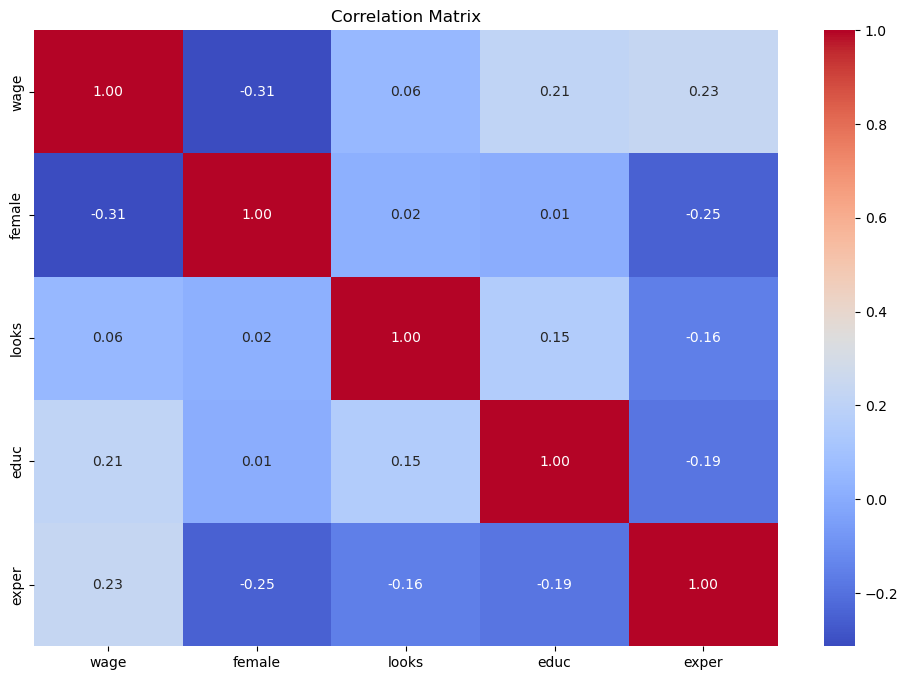

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")

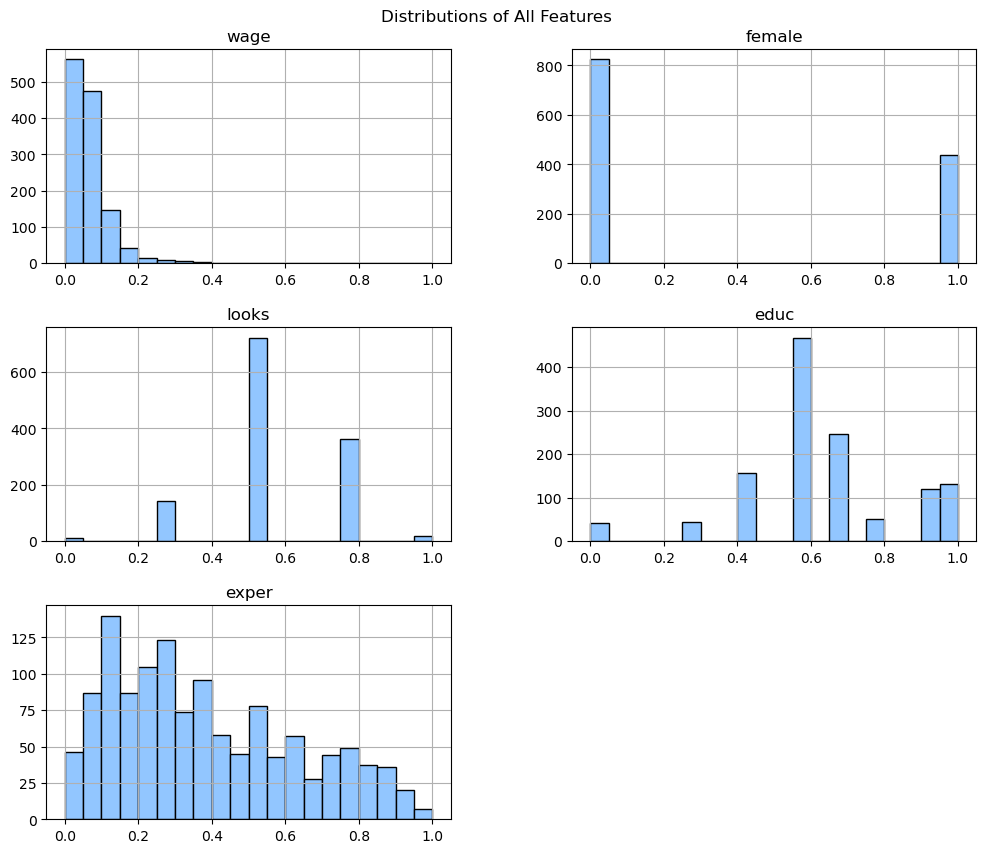

In [17]:
data_scaled.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Distributions of All Features", y=0.92);

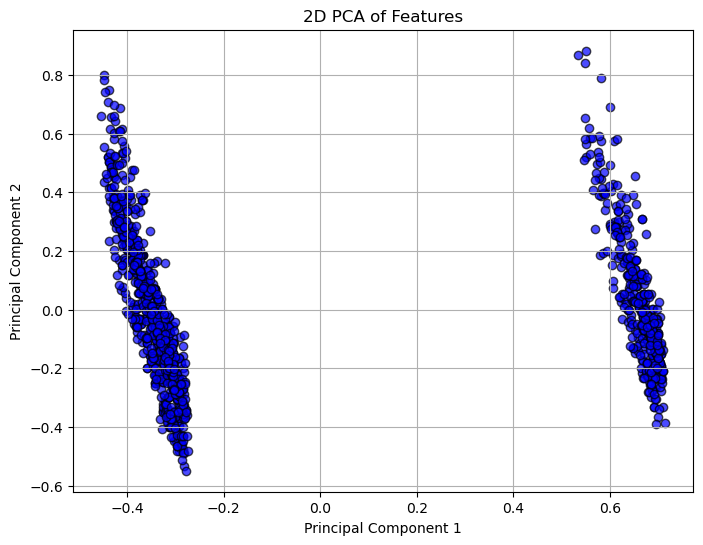

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("2D PCA of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()


In [19]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

Explained variance by each component: [0.62802489 0.17660522]


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'wage'),
  Text(2, 0, 'female'),
  Text(3, 0, 'looks'),
  Text(4, 0, 'educ'),
  Text(5, 0, 'exper')])

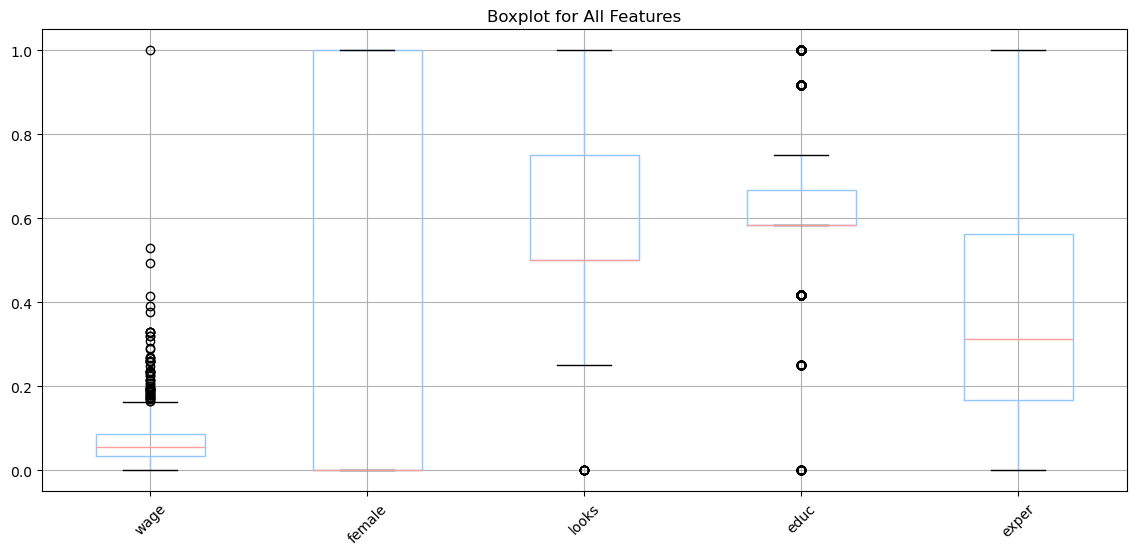

In [20]:
plt.figure(figsize=(14, 6))
data_scaled.boxplot()
plt.title("Boxplot for All Features")
plt.xticks(rotation=45)

In [21]:
Q1 = data_scaled['wage'].quantile(0.25)  # Первый квартиль
Q3 = data_scaled['wage'].quantile(0.75)  # Третий квартиль
IQR = Q3 - Q1                     # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR      # Нижняя граница
upper_bound = Q3 + 1.5 * IQR      # Верхняя граница

outliers = data_scaled[(data_scaled['wage'] < lower_bound) | (data_scaled['wage'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 60


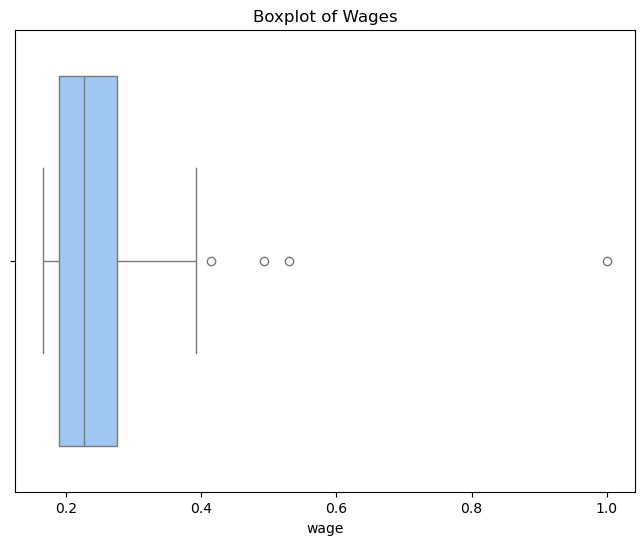

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=outliers['wage'])
plt.title("Boxplot of Wages")
plt.show()


Text(0.5, 1.0, 'Dendrogram')

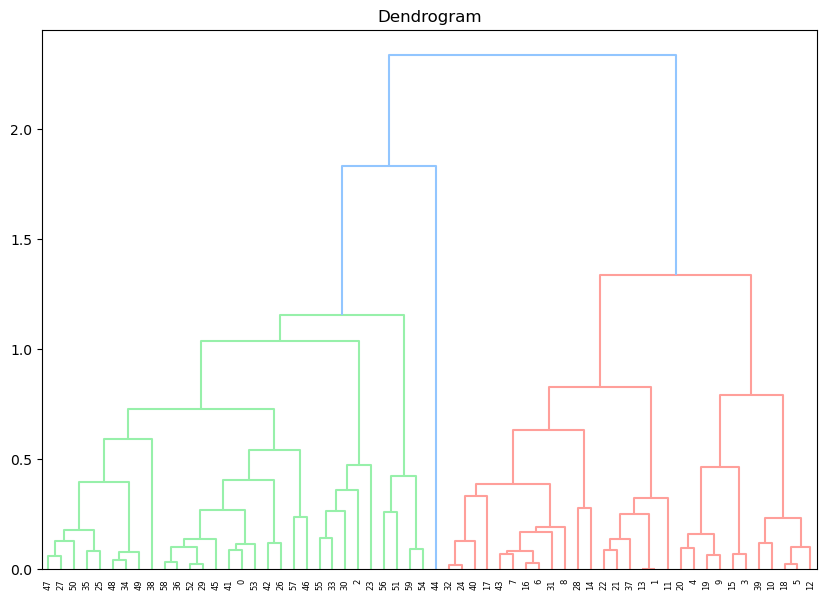

In [23]:
# Построение дендрограммы
linked = linkage(outliers, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')


In [24]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = cluster.fit_predict(data_scaled)

In [25]:
# Сравнение средних значений признаков в кластерах
df.groupby('Cluster_Hierarchical')[features].mean()

,wage,female,looks,educ,exper
Cluster_Hierarchical,,,,,
0,7.368823,0.0,3.177184,12.546117,20.356796
1,4.299358,1.0,3.201835,12.596330,14.142202


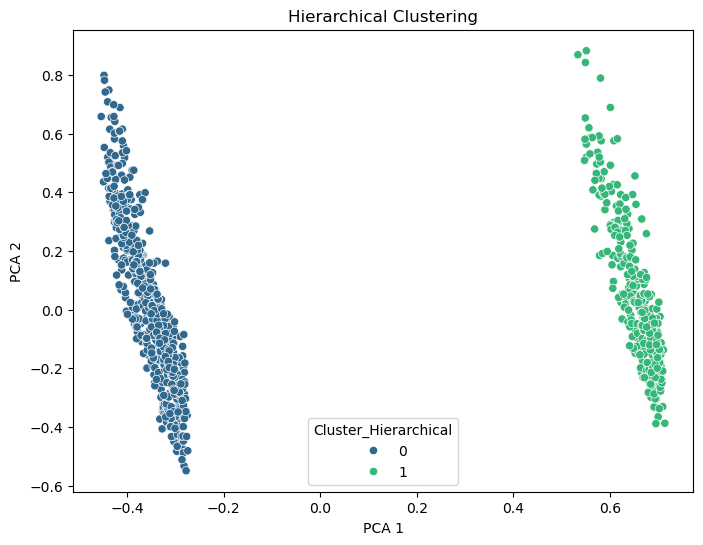

In [26]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster_Hierarchical'], palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

### Силуетный коэффициент измеряет, насколько хорошо кластеризованы объекты. Он принимает значения от -1 до 1, где:

* 1 означает, что точки хорошо разделены;
* 0 указывает на то, что кластеры пересекаются;
* -1 означает, что точки могут быть неправильно отнесены к кластерам.

In [27]:
from sklearn.metrics import silhouette_score

# Оценка кластеризации с использованием силуэта
silhouette_avg = silhouette_score(data_scaled, df['Cluster_Hierarchical'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5792370093102791


### Индекс Дэвиса-Боулдина оценивает среднюю схожесть между каждым кластером и его наиболее похожим кластером. Чем меньше значение, тем лучше.

In [28]:
from sklearn.metrics import davies_bouldin_score

# Оценка кластеризации с использованием индекса Дэвиса-Боулдина
db_score = davies_bouldin_score(data_scaled, df['Cluster_Hierarchical'])
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 0.6640922930345063


In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(data_scaled)
print(f"Inertia (KMeans): {kmeans.inertia_}")

Inertia (KMeans): 174.73658607813132


Text(0, 0.5, 'PCA 2')

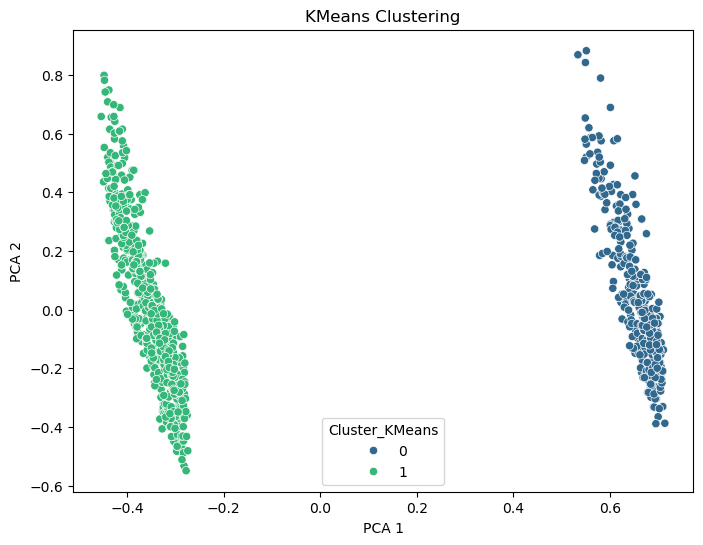

In [30]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster_KMeans'], palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [52]:
df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,Cluster_Hierarchical,Cluster_KMeans
0,5.73,30,0,1,0,1,1,1,14,4,1,0
1,4.28,28,0,1,0,1,1,0,12,3,1,0
2,7.96,35,0,1,0,1,0,0,10,4,1,0
3,11.57,38,0,1,0,0,1,1,16,3,0,1
4,11.42,27,0,1,0,0,1,0,16,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3,1,0
1256,1.68,4,0,1,0,1,1,1,12,2,1,0
1257,3.29,35,0,1,1,1,0,1,12,3,1,0
1258,2.31,15,0,1,1,1,1,1,10,3,1,0


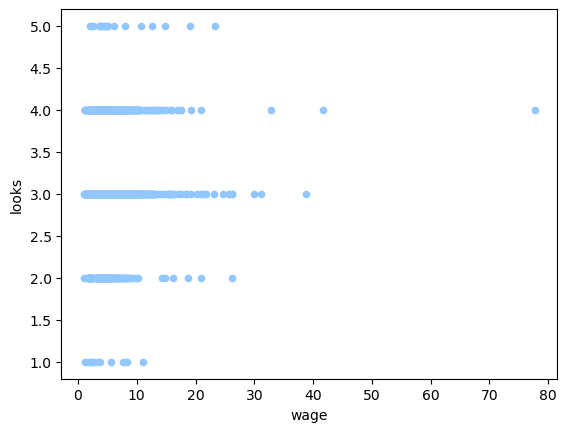

In [54]:
df.plot(kind='scatter', x='wage', y='looks');

## Можно заметить, что людей с оценкой красоты в 5 очень мало и зарплаты у низ в принципе не сильно отличаются от людей с оценкой внешности на 1.

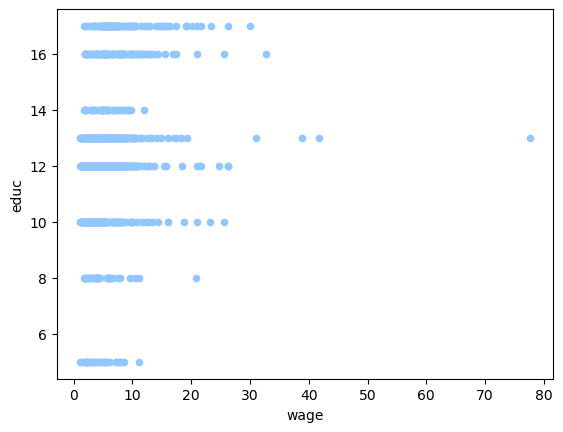

In [55]:
df.plot(kind='scatter', x='wage', y='educ');

## А вот если посмотреть на образование, то можем заметить, что с увеличением количества лет обучения увеличивается и зарплата, разумеется есть и выбросы 

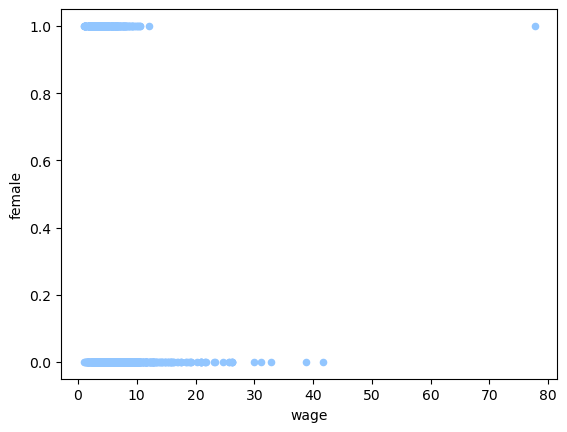

In [56]:
df.plot(kind='scatter', x='wage', y='female');

## Мужчины получают зарплату заметно больше чем женщины

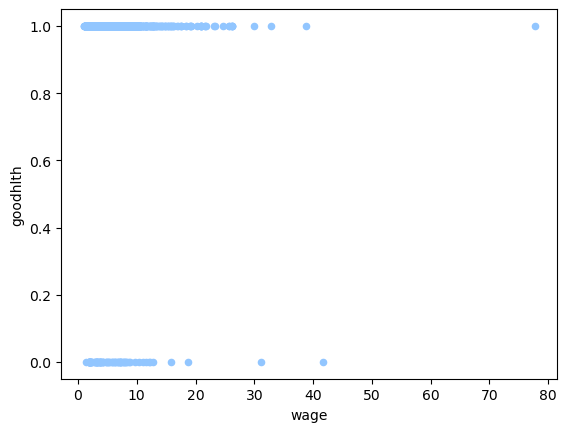

In [58]:
df.plot(kind='scatter', x='wage', y='goodhlth');

## Оценка качества здоровья у людей с высоким уровнем образования и высокой зарплатой увеличивается

---

In [31]:
df.to_csv('data/clustering_results_beauty.csv', index=False)

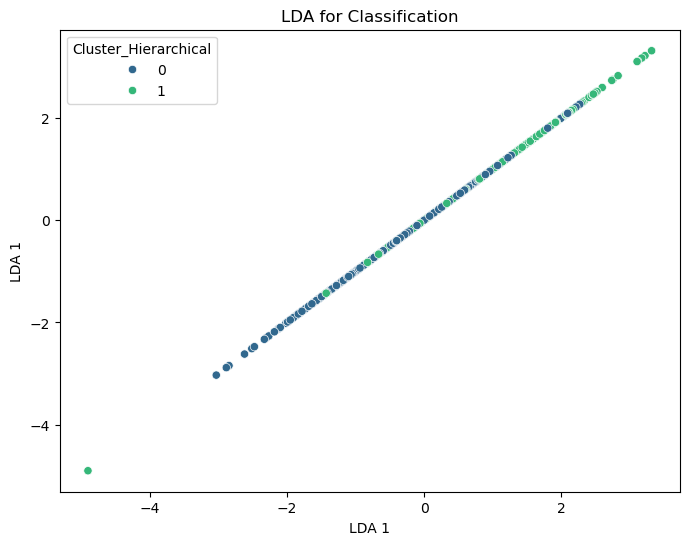

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Cluster_Hierarchical'])  
y = df['Cluster_Hierarchical']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=1)  
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 0], hue=y_train, palette='viridis')
plt.title('LDA for Classification')
plt.xlabel('LDA 1')
plt.ylabel('LDA 1');


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = lda.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')


Accuracy: 0.7037
Precision: 0.5948
Recall: 0.5149
F1-Score: 0.5520
Confusion Matrix:
[[197  47]
 [ 65  69]]


In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")
print(f"Confusion Matrix:\n{cm_logreg}")


Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[244   0]
 [  0 134]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{cm_rf}")


Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[244   0]
 [  0 134]]


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")
print(f"Confusion Matrix:\n{cm_gb}")


Gradient Boosting:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[244   0]
 [  0 134]]
